In [1]:
# imports

import numpy
import scipy
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

In [6]:
def scaled_images (image, *args, **kwargs):
    #default values
    scale_factor = kwargs.get('scale_factor', 2)
    n_scales = kwargs.get('n_scales', 5)
    sig = kwargs.get('sigma',  (2 * scale_factor / 6.0) )
    
    # import image 
    img = mpimg.imread(image)
    yM, xN= img.shape
  
    # output image 
    pyramidImg = numpy.zeros( (yM, (2 * xN)) )
    pyramidImg[0:yM, 0:xN] = img #origional input image 
    pyramidEdge = numpy.zeros( (yM, (2 * xN)) )
    
    smallImg = img
    prevY, prevX = 0, xN    
    for x in range(n_scales): 
        # removes high frequency component of the image
        imgGaus = gaussian_filter(smallImg, sigma=sig) 
        # down sample
        imgDown = imgGaus[::scale_factor, ::scale_factor]
        # display, place in pyramidImg with offset
        smallY, smallX = imgDown.shape
        smallY = smallY + prevY
        smallX = smallX + xN
        pyramidImg[prevY:smallY,xN:smallX] = imgDown 
        sobelP 
        prevY = smallY
        smallImg = imgDown
        
    pyramid = plt.imshow(pyramidImg, cmap='gray',interpolation='nearest')
    
    return pyramidImg

In [7]:
def sobelP (img, pyramidEd):
    sobelX = ndimage.sobel(img, 0)  # horizontal derivative 
    sobelY = ndimage.sobel(img, 1)  # vertical derivative 
    sobelMag = numpy.hypot(sobelX, sobelY)  # magnitude 
    sobelMag *= 255.0 / numpy.max(sobelMag)  # normalize (Q&D) 
    plt.imshow(sobelMag, cmap='gray') 
    # plt.imsave('butterfly _pyramid_edges.jpg', sobelMag, cmap='gray') 
    pyramidEd[prevY:smallY,xN:smallX] = sobelMag
    return sobelMag

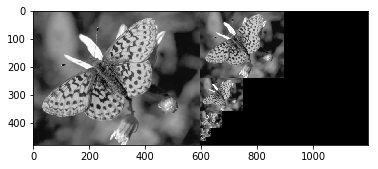

In [8]:
scale1 = scaled_images('butterfly.png')

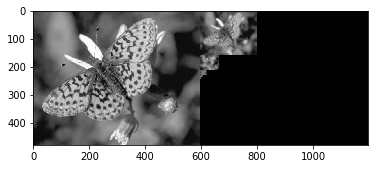

In [4]:
scale2 = scaled_images('butterfly.png', scale_factor=3, n_scales=10, sigma=5)

In [82]:
def corner_detection (image, *args, **kwargs):
    thresholding =  kwargs.get('thresholding', .1) # used for step 4
    minDist = kwargs.get('minDist', 10)  # used for step 5 minimum distance between corners used for non-maximum suppression
    responce = kwargs.get('responce', 1) # used for Step 3, implement two options for computing corner response:
    alpha = kwargs.get('alpha', .05)     # (1) 𝑅 = det(𝑀) − 𝛼 ∗ 𝑡𝑟𝑎𝑐𝑒(𝑀) 2. (Set 𝛼 = 0.05 as default value.)
                                         # (2) 𝑅 = det(𝑀) / (𝑡𝑟𝑎𝑐𝑒(𝑀) + 10−6)
    

    img = mpimg.imread(image)
    img = rgb2gray(img)
    img = numpy.array(img)
    
    # Setp 1 apply gausian to images, use soble to find derivative in x y direction
    libGaus = gaussian_filter(img, sigma=1)
    sobelX = ndimage.sobel(libGaus, 0)  # horizontal derivative 
    sobelY = ndimage.sobel(libGaus, 1)  # vertical derivative 
    # plt.imshow(sobelX, cmap='gray') # test 
    
    # Step 2 second moment matrix in a guassian window around each pixle 
    # products of derivatives at each pixle
    derive2X = sobelX**2
    derive2Y = sobelY**2
    deriveXY = sobelY*sobelX
    # gaussian window  
    S2X = (gaussian_filter(derive2X, sigma=1)) * derive2X
    S2Y = (gaussian_filter(derive2Y, sigma=1)) * derive2Y
    SXY = (gaussian_filter(deriveXY, sigma=1)) * deriveXY
    
    # Step 3 R = corner responce function 
    det = (S2X * S2Y) - (SXY**2)
    trace = S2X + S2Y
    M = [[S2X,SXY],[SXY,S2Y]]
    M = numpy.matrix('1 2; 3 4')
    #M = numpy.matrix('S2X SXY; SXY S2Y')
    #M = [[1, 2], [3, 4]]
    det = numpy.linalg.det(M)
 
    
    #trace = numpy.trace(M)
    #if responce == 1:
    R = det - (alpha * (trace ** 2)) #R.shape (479, 598)
   # elif responce == 2:
      #  R = det / (trace + 10**-6) 
    
   
    #plt.imshow(M) #, cmap='Reds_r')
                   
    return R[0,0]

In [83]:
corner_detection ('butterfly.png')

-2.0

In [64]:
corner_detection ('checkerboard.jpg')

array([[-2.        , -2.        , -2.        , ..., -2.00433601,
        -2.16284147, -2.0175034 ],
       [-2.        , -2.        , -2.        , ..., -2.00433601,
        -2.16284147, -2.0175034 ],
       [-2.        , -2.        , -2.        , ..., -2.00433601,
        -2.16284147, -2.0175034 ],
       ...,
       [-2.        , -2.        , -2.        , ..., -2.00433601,
        -2.16284147, -2.0175034 ],
       [-2.        , -2.        , -2.        , ..., -2.00433601,
        -2.16284147, -2.0175034 ],
       [-2.        , -2.        , -2.        , ..., -2.00433601,
        -2.16284147, -2.0175034 ]])

In [ ]:
 xmax = numpy.max(R[:,0 ])
    #aray = rgb2gray(R)
    #array = numpy.array(R)
    array = R
    # array[array >= .1] = 0
    
    # threshold = thresholding_factor * max_corner_response
    threshold = thresholding * xmax
    #array = numpy.maximum(array, threshold)
    #array[array < threshold] = 1
    # = array.clip(threshold)
    img_copy = numpy.copy(R)
    img_copy1 = img_copy

    for x in range(R.shape[1]):
        for y in range(R.shape[0]):
            if R[y,x] > threshold:
                img_copy[y,x] = False

    img_copy1 = rgb2gray(img_copy) 
    img_copy1 = gaussian_filter(img_copy, sigma=1)
    plt.imshow(img_copy1)  
    plt.imshow(img_copy, cmap='gray')
    
    imgWred = numpy.copy(img)
    for x in range(R.shape[1]):
        for y in range(R.shape[0]):
            if img_copy[y,x] == False:
                imgWred[y,x] = 255
    plt.imshow(R)  
    #plt.imshow(R, cmap='Reds')

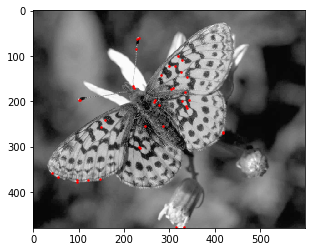

In [79]:
img = mpimg.imread('butterfly.png')
img = rgb2gray(img)
img = numpy.array(img)
#Harris corner detection using skimage library
from skimage.feature import corner_harris, corner_peaks
# print corner_harris(ximage)
coords = corner_peaks(corner_harris(img))

fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)

In [92]:
# import image 
img = mpimg.imread('butterfly.png')
img = rgb2gray(img)
img = numpy.array(img)

for y in range(len(img)):
    img[y,:]